In [67]:
import pandas as pd
import numpy as np

import project

In [68]:
df = pd.read_csv(project.config['filename'])

In [69]:
# Encode Ordinal Variables
columns = ['gill-spacing', 'gill-size', 'stalk-shape', 'ring-number', 'population', 'class']

for column in columns:
        df[column] = df[column].astype('category')

columns = df.select_dtypes(['category']).columns
df[columns] = df[columns].apply(lambda x: x.cat.codes)
df.shape

(8124, 23)

In [70]:
# Encoding Nominal Variables
columns = ['gill-spacing', 'gill-size', 'stalk-shape', 'ring-number', 'population', 'class']

for column in df:
    if column not in columns:
        dummies = pd.get_dummies(df.pop(column))
        column_names = [column + "_" + x for x in dummies.columns]
        dummies.columns = column_names
        df = df.join(dummies)
        
#         df = df.join()

In [73]:
df.shape

(8124, 108)

In [74]:
label = 'class'
X = df.loc[:, df.columns != label]
y = df[label].ravel()

In [75]:
print(X.shape)
print(y.shape)

(8124, 107)
(8124,)


In [77]:
from sklearn.svm import SVC as svm
from sklearn.model_selection import train_test_split
from sklearn import metrics


test_sizes = np.array([0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.5, 0.25])
accuracy = []
auc = []

for test_size in test_sizes:
    print("Test Size: %.2f" % (test_size))
    Xt, Xv, yt, yv = train_test_split(
        X, y,
        test_size=test_size,
#         random_state=np.random.randint(100)
        random_state=42
    )

    m = svm(kernel='poly')
    m.fit(Xt, yt)
    y_pred = m.predict(Xv)
    accuracy.append(metrics.accuracy_score(yv, y_pred))
    auc.append(metrics.roc_auc_score(yv, y_pred))
    print("\tAccuracy: %.3f\n\tAUC: %.3f" % (accuracy[-1], auc[-1]))


Test Size: 0.99
	Accuracy: 0.517
	AUC: 0.500
Test Size: 0.95
	Accuracy: 0.892
	AUC: 0.888
Test Size: 0.90
	Accuracy: 0.891
	AUC: 0.887
Test Size: 0.85
	Accuracy: 0.903
	AUC: 0.900
Test Size: 0.80
	Accuracy: 0.910
	AUC: 0.907
Test Size: 0.75
	Accuracy: 0.917
	AUC: 0.914
Test Size: 0.50
	Accuracy: 0.953
	AUC: 0.952
Test Size: 0.25
	Accuracy: 0.982
	AUC: 0.981


In [78]:
print(accuracy)
print(auc)

[0.5172199428074101, 0.8919409173360975, 0.8910010940919038, 0.9031277150304083, 0.9095384615384615, 0.9166256359757098, 0.9532250123092073, 0.9817823732151649]
[0.5, 0.8881460752388959, 0.8874967185814235, 0.9000027204066773, 0.9065220745944343, 0.9144025589366749, 0.9520521973923137, 0.9813319878910192]


In [79]:
df = pd.DataFrame({
    'accuracy': accuracy,
    'auc': auc
}, index = 1-test_sizes)

lines = df.plot.line()
plt.gca().set(xlabel='Train Size', ylabel='Metrics')
plt.show()

NameError: name 'plt' is not defined

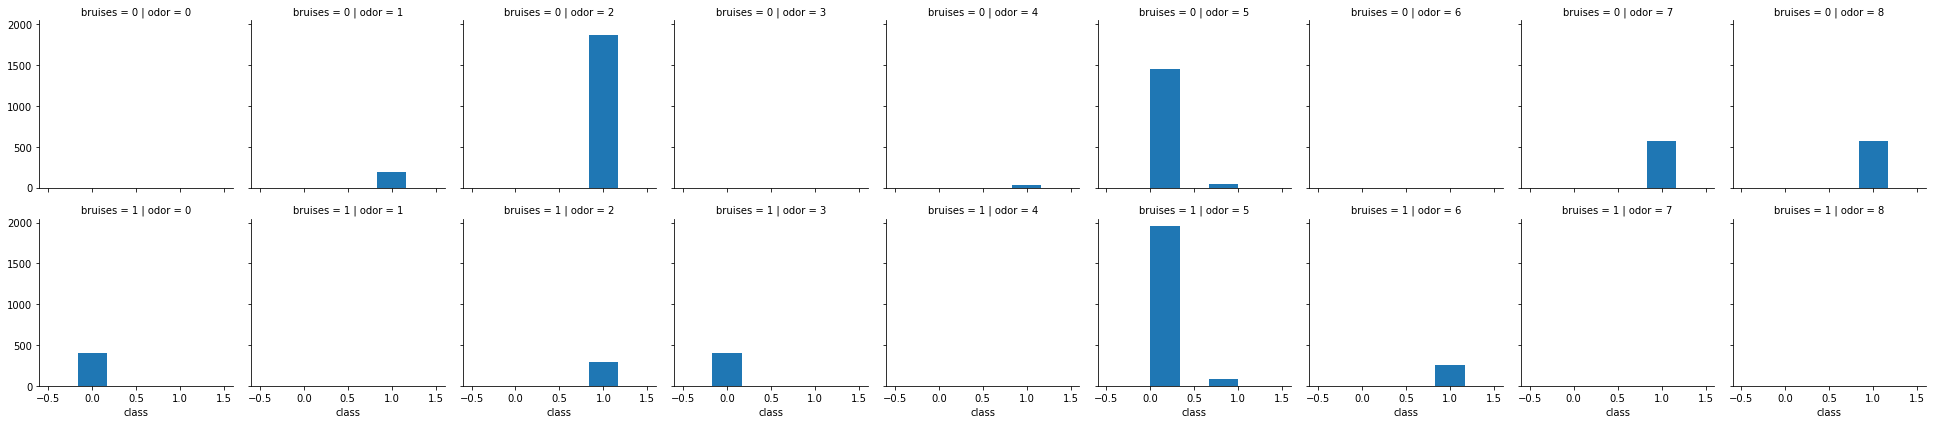

In [23]:
g = sns.FacetGrid(D, row='bruises', col='odor')
g.map(plt.hist, project.config['label'], bins=3)
# Observations:
# Odor = 1, 2, 6, 7, 8 -> Always poisonous
# Odor = 5 -> Mostly edible
# Odor = 0, 3 -> Always edibleYeah 

In [80]:
def linreg(X, y):
    return np.dot(np.linalg.pinv(X), y)

def gss(F, X, y):
    # Your code goes here
    (n, d) = X.shape
    S = []
    J = [i for i in range(0,d)] # no of features
    for f in range(1,F+1):
        # get list of features to iterate on.
        f_iter = []
        for t in J:
            if not (t in S):
                f_iter.append(t)
        best_j = None
        min_error = float("inf")
        for j in f_iter:
            # get X_ = x_{t,sUj}
            S_t = [i for i in S]
            S_t.append(j)
            X_ = X[:,S_t]
            theta_s_u_j = linreg(X_,y)

            # use theta_s_u_j to get training error

            error = (0.5) * np.sum((y - np.dot(X_,theta_s_u_j))** 2)
            if error < min_error:
                min_error = error
                best_j = j

        S.append(best_j)

    #thetaS
    X_ = X[:,S]
    thetaS = linreg(X_,y)
    return (np.asarray(S).reshape(F,1), thetaS)

In [81]:
(n, d) = X.shape
f_set, f_weight = gss(d, X.values, y)
f_weight = f_weight.reshape((d, 1))

In [82]:
X_ = X.values
h = np.zeros(n)
for f in range(d):
    h += X_[:, f_set[f][0]] * f_weight[f][0]

In [83]:
y_pred = (h > 0.5).astype('int8')
np.sum((y_pred != y).astype('int8'))

0